In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_json('data/cocktail_dataset.json')
data

,id,name,category,glass,tags,instructions,imageUrl,alcoholic,createdAt,updatedAt,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 513, 'name': 'Water', 'description': '..."
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."
...,...,...,...,...,...,...,...,...,...,...,...
129,11985,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:43.000+00:00,2024-08-18T19:11:43.000+00:00,"[{'id': 305, 'name': 'Light Rum', 'description..."
130,11987,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:44.000+00:00,2024-08-18T19:11:44.000+00:00,"[{'id': 137, 'name': 'Coffee Brandy', 'descrip..."
131,11989,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 250, 'name': 'Grenadine', 'description..."
132,11991,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",https://cocktails.solvro.pl/images/ingredients...,1,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."


# EDA


In [3]:
data.dtypes
# we have mainly categorical data 

id               int64
name            object
category        object
glass           object
tags            object
instructions    object
imageUrl        object
alcoholic        int64
createdAt       object
updatedAt       object
ingredients     object
dtype: object

In [4]:
data['alcoholic'].unique()
# If we had new data for predictions it might be useful to keep this feature, so with pipeline it could be useful, right now there will be no added value for the training process

array([1])

In [5]:
data['ingredients']
# exact format

0      [{'id': 170, 'name': 'Soda water', 'descriptio...
1      [{'id': 513, 'name': 'Water', 'description': '...
2      [{'id': 305, 'name': 'Light Rum', 'description...
3      [{'id': 482, 'name': 'Sweet Vermouth', 'descri...
4      [{'id': 409, 'name': 'Powdered Sugar', 'descri...
                             ...                        
129    [{'id': 305, 'name': 'Light Rum', 'description...
130    [{'id': 137, 'name': 'Coffee Brandy', 'descrip...
131    [{'id': 250, 'name': 'Grenadine', 'description...
132    [{'id': 2, 'name': 'Gin', 'description': 'Gin ...
133    [{'id': 179, 'name': 'Dark Rum', 'description'...
Name: ingredients, Length: 134, dtype: object

In [18]:
len(data['name'].unique())
# 134 names of drinks

134

In [7]:
# Rows to drop 
data[['imageUrl', 'createdAt', 'updatedAt']]

,imageUrl,createdAt,updatedAt
0,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:01:17.000+00:00,2024-08-18T19:06:16.000+00:00
1,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00
2,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00
3,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:01:58.000+00:00,2024-08-18T19:06:17.000+00:00
4,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:01:59.000+00:00,2024-08-18T19:06:18.000+00:00
...,...,...,...
129,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:11:43.000+00:00,2024-08-18T19:11:43.000+00:00
130,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:11:44.000+00:00,2024-08-18T19:11:44.000+00:00
131,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00
132,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:11:45.000+00:00,2024-08-18T19:11:45.000+00:00


In [8]:
data = data.drop(columns = ['imageUrl', 'createdAt', 'updatedAt'])
data

,id,name,category,glass,tags,instructions,alcoholic,ingredients
0,11000,Mojito,Cocktail,Highball glass,"[IBA, ContemporaryClassic, Alcoholic, USA, Asi...",Muddle mint leaves with sugar and lime juice. ...,1,"[{'id': 170, 'name': 'Soda water', 'descriptio..."
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[IBA, Classic, Alcoholic, Expensive, Savory]",Place sugar cube in old fashioned glass and sa...,1,"[{'id': 513, 'name': 'Water', 'description': '..."
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[Strong, Asia, StrongFlavor, Brunch, Vegetaria...",Combine all ingredients (except cola) and pour...,1,"[{'id': 305, 'name': 'Light Rum', 'description..."
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[IBA, Classic]","Stir into glass over ice, garnish and serve.",1,"[{'id': 482, 'name': 'Sweet Vermouth', 'descri..."
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[IBA, Classic, Alcoholic, ContemporaryClassic]","Shake with ice. Strain into chilled glass, gar...",1,"[{'id': 409, 'name': 'Powdered Sugar', 'descri..."
...,...,...,...,...,...,...,...,...
129,11985,Quarter Deck Cocktail,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",1,"[{'id': 305, 'name': 'Light Rum', 'description..."
130,11987,Queen Bee,Ordinary Drink,Cocktail glass,None,"Shake all ingredients with ice, strain into a ...",1,"[{'id': 137, 'name': 'Coffee Brandy', 'descrip..."
131,11989,Queen Charlotte,Ordinary Drink,Collins glass,None,Pour red wine and grenadine into a collins gla...,1,"[{'id': 250, 'name': 'Grenadine', 'description..."
132,11991,Queen Elizabeth,Ordinary Drink,Cocktail glass,None,"Stir all ingredients with ice, strain into a c...",1,"[{'id': 2, 'name': 'Gin', 'description': 'Gin ..."


In [9]:
data['category'].value_counts()

Ordinary Drink         127
Cocktail                 6
Punch / Party Drink      1
Name: category, dtype: int64

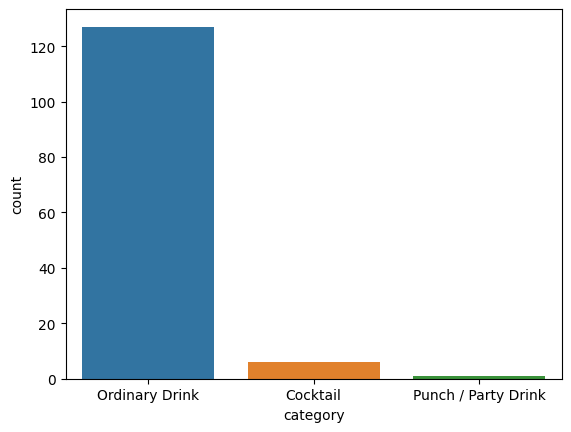

In [10]:
value_counts = data['category'].value_counts().reset_index()
value_counts.columns = ['category', 'count']
sns.barplot(x='category', y='count', data=value_counts)

plt.show()


In [11]:
data['glass'].value_counts()

Cocktail glass         59
Old-fashioned glass    25
Highball glass         17
Whiskey sour glass     11
Collins glass          10
Champagne flute         6
Pousse cafe glass       2
Copper Mug              1
Whiskey Glass           1
Brandy snifter          1
White wine glass        1
Name: glass, dtype: int64

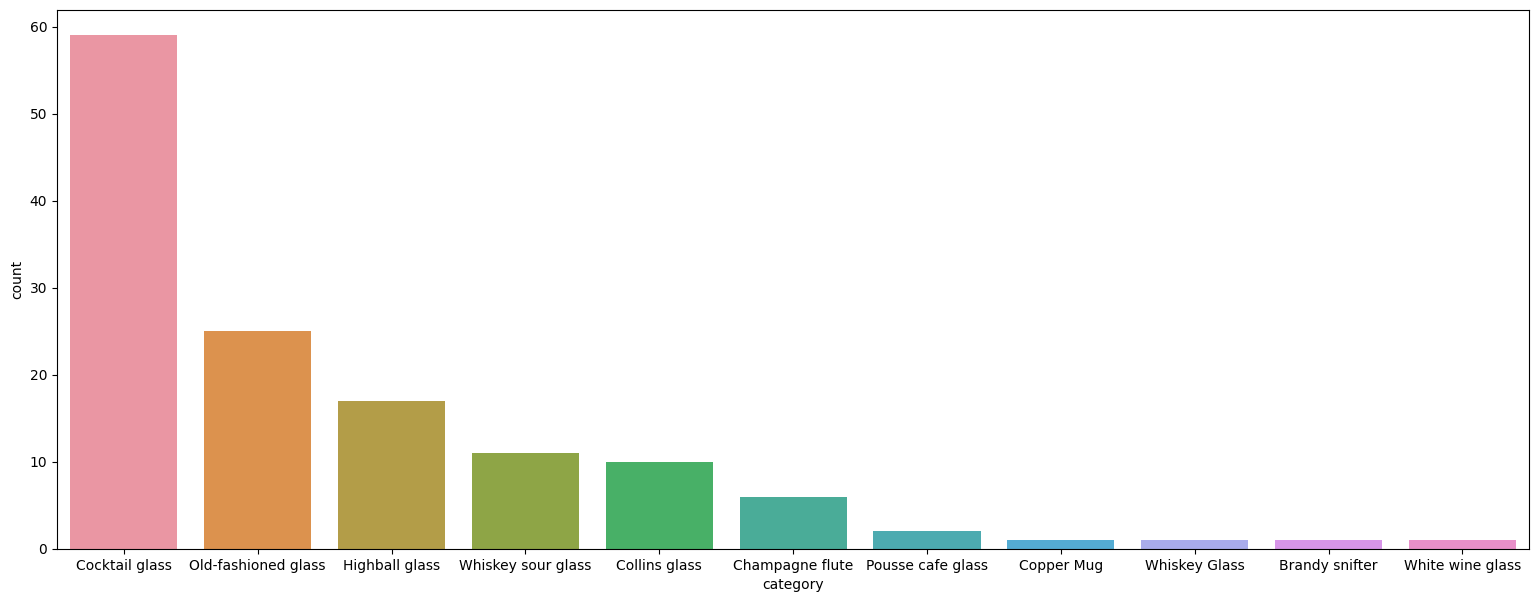

In [12]:
plt.figure(figsize=(19, 7))
value_counts = data['glass'].value_counts().reset_index()
value_counts.columns = ['category', 'count']
sns.barplot(x='category', y='count', data=value_counts)

plt.show()

In [13]:
data['tags'].value_counts

<bound method IndexOpsMixin.value_counts of 0      [IBA, ContemporaryClassic, Alcoholic, USA, Asi...
1           [IBA, Classic, Alcoholic, Expensive, Savory]
2      [Strong, Asia, StrongFlavor, Brunch, Vegetaria...
3                                         [IBA, Classic]
4         [IBA, Classic, Alcoholic, ContemporaryClassic]
                             ...                        
129                                                 None
130                                                 None
131                                                 None
132                                                 None
133                                                 None
Name: tags, Length: 134, dtype: object>

In [14]:
data['tags'].isna().sum()
# 99 rows out of 134 are missing for this column


99

In [15]:
data[['category', 'glass', 'tags', 'instructions', 'ingredients']].describe()

,category,glass,tags,instructions,ingredients
count,134,134,35,134,134
unique,3,11,24,106,134
top,Ordinary Drink,Cocktail glass,"[IBA, ContemporaryClassic]","Shake all ingredients with ice, strain into a ...","[{'id': 170, 'name': 'Soda water', 'descriptio..."
freq,127,59,10,12,1
